## Causal Impact BSTS (Bayesian Structural Time Series)

Google developed an open source package - CaualImpact which helps in understanding the cause of an event using Bayesian Structural Time Series.

#### Causal Inference:
Causal inference is the branch of statistics that concerns with effects of the consequences of actions. When humans rationalise the world, we often think in terms of cause and effect — if we understand why something happened, we can change our behavior to improve future outcomes. Identifying one causal law in your data can be more powerful than dozens and dozens of correlational patterns.

Causal inference is commonly used in behavioral science research to understand the causes behind the results we see from experiments or observations. It helps in solving challenging problems such as estimating the treatment effect when a randomized controlled experiment is not possible or addressing additional complexities within the experimental data.

#### What is causal inference?
Causal inference consists of a family of statistical methods whose purpose is to answer the question of “why” something happens. Standard approaches in statistics, such as regression analysis, are concerned with quantifying how changes in X are associated with changes in Y. Causal inference methods, by contrast, are used to determine whether changes in X cause changes in Y. Therefore, unlike methods that are concerned with associations only, causal inference approaches can answer the question of why
Y changes. If X is causally related with Y, then Y’s change can be explained in terms of X’s change.

#### Why is causal inference important?
At a high level, causal inference helps us provide a better user experience for customers. The insights from causal inference can help identify customer pain points, inform product development, and provide a more personalized experience. For example, if we know that users are submitting customer support tickets due to a lack of clarity around how to use a new feature and not dissatisfaction with the feature itself, we can focus on improving the communications around how to use this feature rather than updating or decommissioning the feature.

Another example, if we know that an eater regularly orders certain types of cuisine on the platform, we can make meal recommendations and provide them with the most relevant information.

At a more granular level, causal inference enables data scientists and product analysts to answer causal questions based on observational data, especially when A/B testing is not possible, or gain additional insights from a well-designed experiment. For example, we may launch an email campaign that is open for participation to all customers in a market. In this case, since we don’t have a randomized control group, how do we measure the campaign’s effect? In another example, suppose we have a randomized, controlled A/B test experiment but not everyone in the treatment group actually receive the treatment (i.e., if they don’t open the email). How do we estimate the treatment effect for the treated? Causal inference enables us to answer these types of questions, leading to better user experiences on our platform.


#### Association/Correlation vs Causation
Example: Company ABC has created a new shopping app. Uninstall rates are very high despite the app having a convenient user interface and not being too heavy. A more in-depth look into the data shows that there is a correlation between cart abandonment and uninstalls.

The best approach to tackle this situation would be targeting cart abandoners with remarketing or offering a guest checkout option. But what if cart abandonment was not the cause of uninstalls?

If the real issue causing both cart abandonment and uninstalls was too many purchasing steps that deterred customers from the actual checkout, all the actions suggested above would prove unhelpful.

Causal Inference is a technique used to determine whether changes in a variable X CAUSES change in another variable, namely Y.
The gold standard for establishing cause and effect is <b>randomised controlled trials or A/B tests</b>. However, we cannot always conduct such experiments as they are expensive, time-consuming, and at times unethical. Instead, we rely on observational data and statistics to get us the answer.


#### Understanding Causal Impact 
In reality, we can never ever observe a causal effect because we can't observe both potential outcomes at the same time. So, what we will do is, we will run statistical experiments where we observe some of the potential outcomes under the treatment and some under no treatment, usually called "Observational methods". We use Observational analysis methods to try and understand estimated causal effects in the absence of an experiment.

1. Define Treatment and Control Group.
2. Define covariates: X1 and X2. Usually other time series which are not affected by treatment but are predictive of our outcome. For example - web searches for our industry, web searches for our competitors products or the stock market or even the weather. These time series that are correlated with our outcome of interest yet they're not directly themselves affected by the treatment.
3. Predict the Counterfactuals: We train our model in the pre period and then apply the model in the post period
4. Point wise causal effect and cumulative causal effect


The algorithm basically fits a Bayesian structural model on past observed data to make predictions on what future data would look like. Past data comprises everything that happened before an intervention (such as a marketing campaign that starts to run at a given point). It then compares the counterfactual (predicted) series against what was really observed in order to extract statistical conclusions. If we can predict the counterfactural with sufficient confidence, we can measure the effect of the intervention by comparing the difference between the counterfactual and what is actually observed.


In industry, <b>businesses want to know what causal effect their strategies (e.g. promotional offers) have on customer behavior</b>. Here, of course, business have a major advantage because the assignment mechanism into the treatment group (e.g. whom to send a discount code) is known and under their control. They often also have richer “pre-treatment” behavior for each individual (customer) which can help both assess and correct for bias. Good businesses don’t act at random. For example, we market to customers who are likely to be interested in our company and who, therefore, might have been interested even without marketing. When it comes to measuring effectiveness, good business is bad science. Because our treatments are not given at random, comparing the outcomes of treated and untreated groups is confounded and biased towards making us think we are more effective than we actually may be.


#### Example - Analysing the effect of marketing campaign on Sales using BSTS

In this example, we will analyse the effect of a marketing campaign on weekly sales of a retail store. Dataset contains sales data for multiple stores for multiple departments. 
The dataset can be downloaded from data folder.

Workflow:
1. Import required libraries
2. Exploratory Data Analysis(EDA)
3. Data Preprocessing 
4. Identifying Treatment/Test group for Causal analysis.
5. Identifying Control groups using Dynamic Time Warping(DTW).
6. Creating artficial marketing activity to generate lift.
7. Implement Causal Impact model
8. Analyse the results

### Import Libraries

In [141]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from causalimpact import CausalImpact
from dtw import dtw

import warnings
warnings.filterwarnings('ignore')

## Explore dataset

Lets explore the sales dataset.

In [142]:
df = pd.read_csv('./data/sales data-set.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


We need to change the data type of Date column.

#### Check for missing values

In [144]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

No missing values observed. 
Lets check for Store and Dept data.

In [145]:
print("Store values:", df['Store'].unique())

print("\nDept values: ", df['Dept'].unique())

Store values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

Dept values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


#### Data Pre-processing

In [146]:
print("Total rows: ", df.shape[0])
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values(['Store','Dept','Date'], inplace=True)

Total rows:  421570


Let us load the store details from stores dataset.

In [147]:
df_store = pd.read_csv('./data/stores data-set.csv')
print("Total rows: ", df_store.shape[0])
print("Store types:", df_store['Type'].unique())
df_store.head()

Total rows:  45
Store types: ['A' 'B' 'C']


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


All the stores are categorized into 3 types A,B and C based on store size. Let's look at their min. and max. sizes.

In [148]:
print("Store Type-A (minsize, maxsize):",df_store.loc[df_store['Type'] == 'A', 'Size'].min(), \
      df_store.loc[df_store['Type'] == 'A','Size'].max())

print("Store Type-B (minsize, maxsize):",df_store.loc[df_store['Type'] == 'B', 'Size'].min(), \
      df_store.loc[df_store['Type'] == 'B','Size'].max())

print("Store Type-C (minsize, maxsize):",df_store.loc[df_store['Type'] == 'C', 'Size'].min(), \
      df_store.loc[df_store['Type'] == 'C','Size'].max())

Store Type-A (minsize, maxsize): 39690 219622
Store Type-B (minsize, maxsize): 34875 140167
Store Type-C (minsize, maxsize): 39690 42988


It seems there is an overlap between the sizes of stores. But clearly, Store type-A are usually the bigger stores and Store type-C are usually the smallest in size.
Let us look at Type A stores in detail.

In [149]:
df_store[df_store['Type'] == 'A'].sort_values('Size') #1,26,8,40,34

,Store,Type,Size
32,33,A,39690
35,36,A,39910
0,1,A,151315
25,26,A,152513
7,8,A,155078
39,40,A,155083
33,34,A,158114
38,39,A,184109
40,41,A,196321
13,14,A,200898


As can be seen from the data, store no. 1,26,8,40,34 are quite similar in sizes. Lets correlate these stores with the department information and yearly aggregated sales just to see if the similar sized stores have similar sales or not.

In [150]:
## Checking for Dept = 1
dept = 1
store_list = [1,26,8,40,34]


df['Year'] = df['Date'].dt.year
df_agg = df[(df['Store'].isin(store_list)) & (df['Dept'] == dept)].groupby(['Year', 'Store', \
                                                                            'Dept'])['Weekly_Sales'].sum().reset_index()
df_agg = pd.pivot_table(df_agg, index='Store', values='Weekly_Sales', columns='Year')
df_agg

Year,2010,2011,2012
Store,,,
1,1126348.73,1171550.80,921505.65
8,732453.55,778283.60,604208.16
26,1034924.51,985164.19,754506.40
34,954156.16,1047437.97,850908.82
40,953921.17,977030.07,756673.53


In [151]:
## Checking for Dept = 4
dept = 4
store_list = [1,26,8,40,34]


df['Year'] = df['Date'].dt.year
df_agg = df[(df['Store'].isin(store_list)) & (df['Dept'] == dept)].groupby(['Year', 'Store', \
                                                                            'Dept'])['Weekly_Sales'].sum().reset_index()
df_agg = pd.pivot_table(df_agg, index='Store', values='Weekly_Sales', columns='Year')
df_agg

Year,2010,2011,2012
Store,,,
1,1760916.80,1896108.60,1628848.69
8,992330.60,1087384.02,936056.61
26,1154207.00,1260877.54,1088145.74
34,939995.62,1017970.45,872219.72
40,1144340.60,1263415.86,1079548.87


By checking sales of these 4 stores for Dept=1 and 4, it looks like Stores 26 and 40 are somewhat similar. But lets verify this hypothesis, statistically as well.

### Dynamic Time Warping (DTW) 
DTW identifies similarity between two time sequences by computing distance and cost matrix between them. 
We will use DTW to identify Similar stores for store no - 26 for Dept = 4 among all the 45 stores.

In [152]:
dept = 4
store_to_check_for_similarity = 26
store_list = list(df['Store'].unique())
store_list.remove(store_to_check_for_similarity)

x=df.loc[(df['Store']==store_to_check_for_similarity) & (df['Dept']==dept), 'Weekly_Sales']

df_similarity = pd.DataFrame()
for i,store in enumerate(store_list):
    dtw_dis =  pd.DataFrame()
    y =df.loc[(df['Store']==store) & (df['Dept']==4), 'Weekly_Sales']
    dtw_df = dtw(x,y, keep_internals=True)
    dtw_dis['Store'] = [store]
    dtw_dis['Dtw_distance'] = [dtw_df.distance]
    #print(store, ":", dtw_df.distance)
    
    if i==0:
        df_similarity = dtw_dis.copy()
    else:
        df_similarity = pd.concat([df_similarity, dtw_dis], axis=0)
df_similarity.reset_index(inplace=True, drop=True)

# Top 2 Similar stores based on DTW similarity
similar_stores = df_similarity.sort_values('Dtw_distance').head(2)
print(similar_stores)

similar_stores = similar_stores['Store'].values

    Store  Dtw_distance
38     40     161755.43
43     45     206308.05


Bingo! Our analysis is right so far. Store 26 and 40 are indeed similar. Let's look at the plots for these similar stores.

429


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

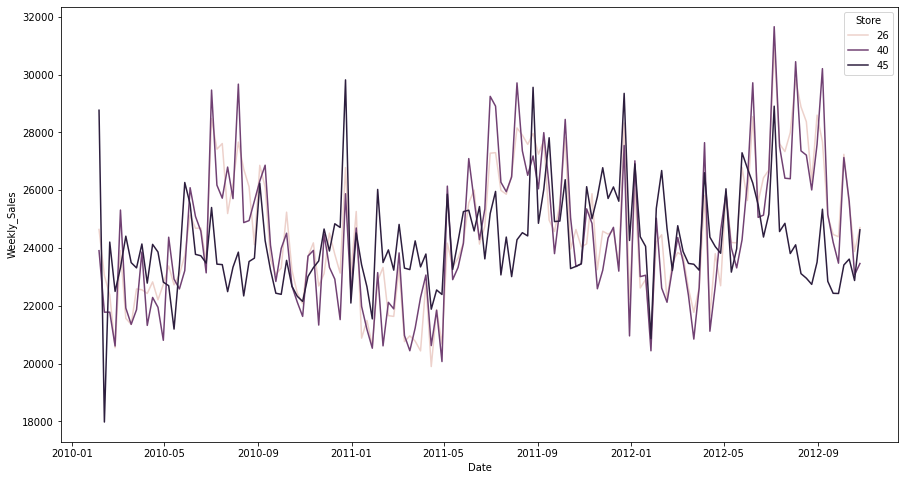

In [153]:
stores = [store_to_check_for_similarity] + list(similar_stores)
df_sales = df[(df['Store'].isin(stores)) & (df['Dept'] == dept)]
print(df_sales.shape[0])

plt.figure(figsize=(15,8))
sns.lineplot(x=df_sales["Date"],y=df_sales["Weekly_Sales"],hue=df_sales["Store"])

It can be seens here that stores 40 and 45 are similar to store 26 for dept=4.


### Create a hypothetical marketing activity for Store=26
In order to analyse causal impact, we will try to manually infuse some intervention and will try to estimate the effect of this intervention with respect to counterfactuals.

Lets add a marketing campaign for Dept=4 of Store=26 for March 2012.

Create adjusted sales variable - 30% increase in weekly sales during the marketing campaign. 

In [154]:
df_sales['marketing_campaign'] = np.where(((df_sales['Store'] == store_to_check_for_similarity) &\
                                           (df_sales['Date']  >= "2012-03-01") \
                                           & (df_sales['Date'] < "2012-04-01")), True, False)


df_sales['Adj_Sales'] = np.where(df_sales['marketing_campaign'] == True, df_sales['Weekly_Sales']*1.3, df_sales['Weekly_Sales'])

#### Plotting adjusted weekly sales against original weekly sales

<AxesSubplot:title={'center':'Adj_Sales'}, xlabel='Date'>

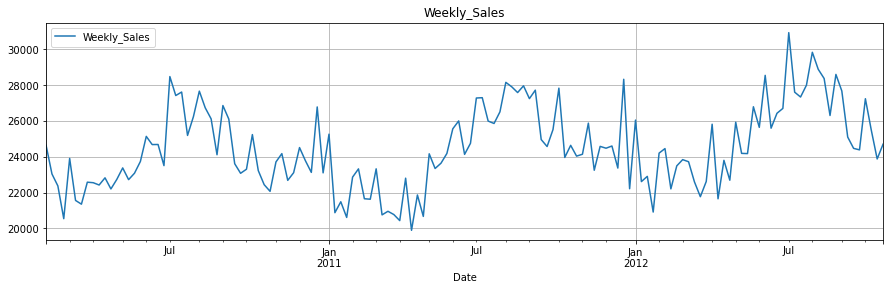

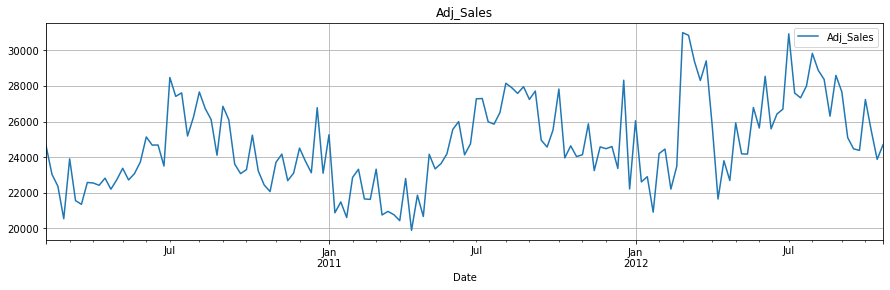

In [155]:
## plot adjusted weekly sales against original data
df_sales_store = df_sales[df_sales['Store']==store_to_check_for_similarity]
df_sales_store.plot(x='Date',y='Weekly_Sales', figsize=(15,4), grid=True, title='Weekly_Sales')
df_sales_store.plot(x='Date',y='Adj_Sales', figsize=(15,4), grid=True, title='Adj_Sales')

From the plot we can see the artificial marketing campaign-induced lift in March 2012. We can now go ahead and get these data ready for our causal inference analysis.

## Set up Causal Analysis

1. Treatment Group = Store-26
2. Control Group = Similar stores i.e. Stores-40, 45
3. Pre-Intervention period = before march 2012 
4. Post- Intervention Period = march 2012

In [156]:
df_marketing = df_sales[['Date', 'Store', 'Adj_Sales']]
df_marketing = pd.pivot_table(data=df_marketing, index='Date', values='Adj_Sales', columns='Store')
df_marketing.columns = ['Store' + str(col) for col in list(df_marketing.columns)]

df_marketing.head()

,Store26,Store40,Store45
Date,,,
2010-02-05,24639.60,23906.14,28764.16
2010-02-12,23040.93,21778.87,17979.14
2010-02-19,22375.12,21779.47,24204.04
2010-02-26,20547.32,20609.53,22497.50
2010-03-05,23911.15,25311.53,23319.56


In [157]:
# create pre and post periods
pre_period = [df_marketing.index[0],df_marketing.index[df_marketing.index < "2012-03-01"].max()]
post_period = [df_marketing.index[df_marketing.index > "2012-03-01"].min(), \
               df_marketing.index[df_marketing.index <= "2012-03-31"].max()]
print("Pre period: ", pre_period)
print("Post period: ", post_period)

df_marketing = df_marketing[df_marketing.index <= post_period[1]]

Pre period:  [Timestamp('2010-02-05 00:00:00'), Timestamp('2012-02-24 00:00:00')]
Post period:  [Timestamp('2012-03-02 00:00:00'), Timestamp('2012-03-30 00:00:00')]


## Implementing Causal Impact

                               Average        Cumulative
Actual                           29785            148928
Predicted                        23054            115271
95% CI                  [21269, 24838]  [106348, 124194]
                                                        
Absolute Effect                   6731             33656
95% CI                    [8516, 4946]    [42580, 24733]
                                                        
Relative Effect                  29.2%             29.2%
95% CI                  [36.9%, 21.5%]    [36.9%, 21.5%]
                                                        
P-value                           0.0%                  
Prob. of Causal Effect          100.0%                  
None


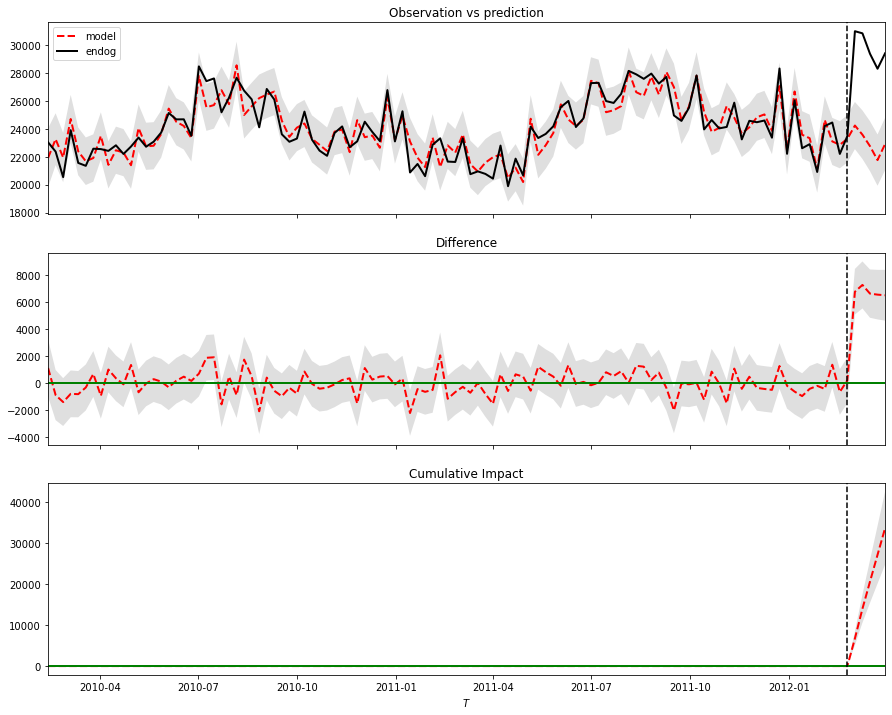

In [158]:
# perform Bayesian structural time series analysis for causal inference
causal_impact = CausalImpact(df_marketing, pre_period, post_period)
causal_impact.run()
print(causal_impact.summary())
causal_impact.plot()

Voila! The summary output predicts a relative effect of 29.2%; not a bad prediction as it was a 30% lift we created when we prepared our artificial dataset. The 95% credible interval for this figure is 37%, 22%, and the p-value looks very convincing as well. In this case, we can be quite confident that our marketing campaign made a difference. 


In [159]:
causal_impact.summary('report')

 During the post-intervention period, the response variable had an average value of approx. 29785.  By contrast, in  the
absence of an intervention, we would have expected an average response of 23054. The 95% interval of this counterfactual
prediction is [21269, 24838]. Subtracting this prediction from the observed response yields an estimate of the causal
effect the intervention had on the response variable. This effect is 6731 with a 95% interval of [8516, 4946]. For a
discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 148928.  By contrast, had  the intervention not taken place,
we would have expected a sum of 148928. The 95% interval of this prediction is [106348, 124194]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  29.

### Conclusion

We are able to generate the similar lift ( ~ 29%) that we had artifically injected within the data (~30%).
 

In real scenario, campaigns/marketing activity effect lasts longer than just the camapign duration. So, it would be good to add some padding after the campaign to see the real customer behaviour. In this example, as we had artificially injected the marketing activity, so it would not make sense to measure the campaign performance after this period. 

References:

https://github.com/google/CausalImpact

https://www.latentview.com/blog/causal-inference-exploring-the-how-behind-the-why/

https://towardsdatascience.com/inferring-causality-in-time-series-data-b8b75fe52c46#:~:text=Causal%20inference%20over%20random%20variables,and%20thus%20over%20stochastic%20processes)

https://emilyriederer.netlify.app/post/causal-design-patterns/

https://pypi.org/project/dtw-python/1.1.10/